In [1]:
# Useful for debugging
%load_ext autoreload
%autoreload 2
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import sys, os

from matplotlib import pyplot as plt


# LCLS Injector
---

# Solenoid Set up

In [2]:
from gpt.maps import Map2D_B

solenoid_centers = [0.17321817913611792, 4]

sol1_map = 'fields/solenoid_12cm_distance.gdf'
sol1 = Map2D_B('sol1', sol1_map)

sol2_map = 'fields/wifel_solenoid.gdf'
sol2 = Map2D_B('sol12', sol2_map)

# Cavities

In [3]:
from gpt.maps import Map25D_TM

swifel_map = 'fields/swifel_gun_7_cm_gap_2_cm_pipe.gdf'
swifel = Map25D_TM('swifel', 
                   swifel_map,  
                   frequency=0.185916496e9)

c9_map = 'fields/tesla_9cell_cavity.gdf'

cavity9_centers = [1.9471379962147757, 6, 7.3836, 8.767199999999999, 10.1508, 11.5344, 12.918, 14.301599999999997,15.6852]
cavity9_maxe = [13.745260538205162, 11.946233551708557, 25.384865363246163, 12.152605998968443, 8.918661237543773, 32, 32, 32, 32]


# Lattice

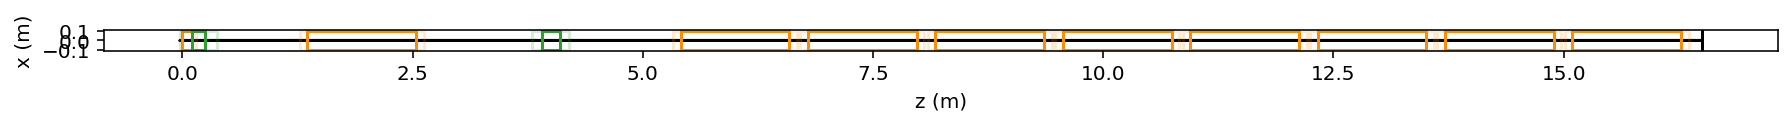

In [4]:
from gpt.element import Lattice
from gpt.element import Screen

inj = Lattice('lcls-injector')
inj.add(swifel, ds=0, element_origin='beg')
inj.add(sol1, ds=solenoid_centers[0], ref_element='beg', element_origin='center')
inj.add(sol2, ds=solenoid_centers[1], ref_element='beg', element_origin='center')

for ii in range(9):
    inj.add(Map25D_TM(f'c9{ii+1}', c9_map, frequency=1.3e9, scale=cavity9_maxe[ii]*1e6), 
            ds=cavity9_centers[ii], ref_element='beg', element_origin='origin')
    
inj.add(Screen('scr1'), ds=16.5, ref_element='beg')

plt.figure(figsize=(15,4))
inj.plot_floor();

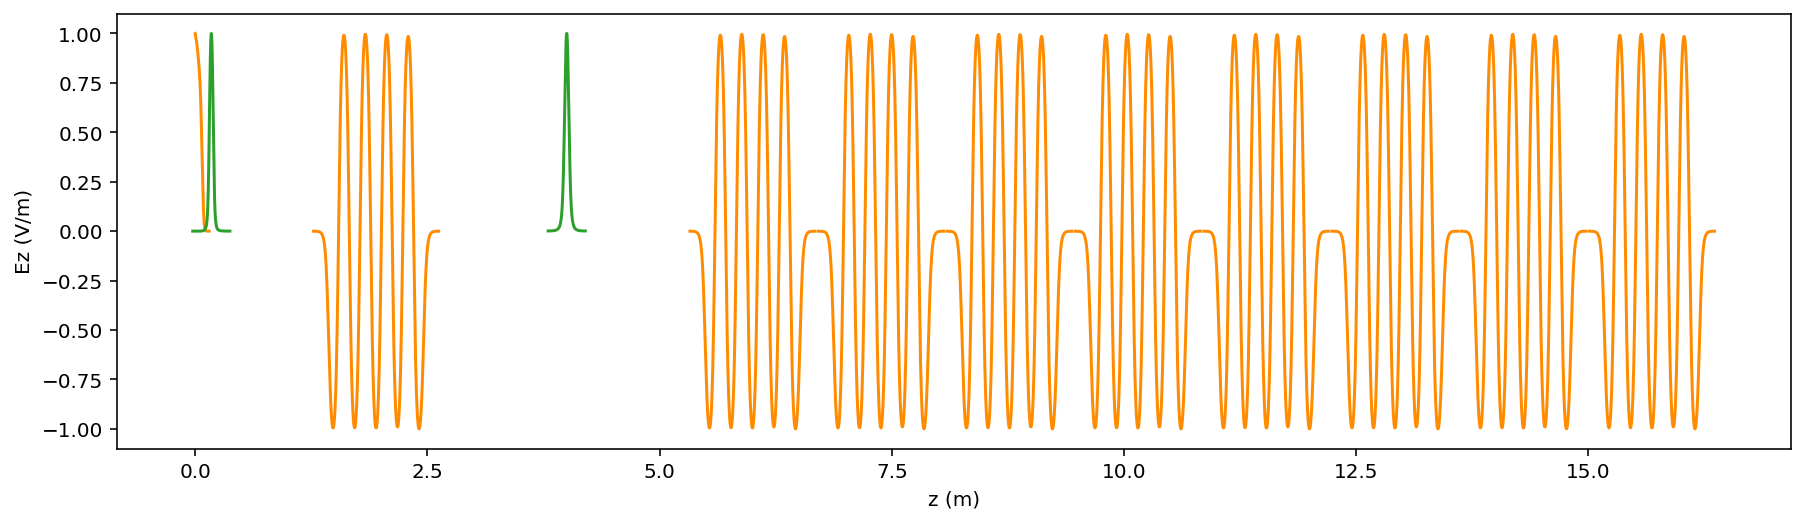

In [5]:
plt.figure(figsize=(15,4))
inj.plot_field_profile();

In [6]:
inj.write_gpt_lines(output_file='gpt.in', legacy_phasing=True);

In [7]:
# NOTE: make sure the include space_charge=1 and cathode=1 
# in your settings in order to turn those features on in GPT

In [8]:
# AFILE = os.environ['LCLS2HE_LATTICE']+'/astra/models/sc_inj2/v1/astra.in'
# from astra import Astra
# A = Astra(AFILE)
# ACAV = A.input['cavity']
# ASOL = A.input['solenoid']
# def cav_info(i):
#     """
#     Get cavity data from Astra
#     """
#     if i == 1:
#         name = 'swifel'
#     else:
#         name = f'c9{i-1}'
#     d = {}
#     d[name+'_scale'] = ACAV[f'maxe({i})']*1e6
#     d[name+'_realtive_phase'] = ACAV[f'phi({i})']
#     return d
# 
# CDAT = {}
# for i in range(1,11):
#     CDAT.update(cav_info(i))
# 
# CDAT['sol11_scale'] = ASOL['maxb(1)']
# CDAT['sol12_scale'] = ASOL['maxb(2)']
# CDAT    

In [9]:
# Settings from Astra

SETTINGS={'swifel_scale': 30000000.0,
 'swifel_realtive_phase': 0,
 'c91_scale': 13745260.538205162,
 'c91_realtive_phase': -56.64512789009524,
 'c92_scale': 11946233.551708557,
 'c92_realtive_phase': -6.516777279789954,
 'c93_scale': 25384865.363246165,
 'c93_realtive_phase': 31.090015374312785,
 'c94_scale': 12152605.998968443,
 'c94_realtive_phase': 1.3181929346671777,
 'c95_scale': 8918661.237543773,
 'c95_realtive_phase': 4.403450504818665,
 'c96_scale': 32000000.0,
 'c96_realtive_phase': 0,
 'c97_scale': 32000000.0,
 'c97_realtive_phase': 0,
 'c98_scale': 32000000.0,
 'c98_realtive_phase': 0,
 'c99_scale': 32000000.0,
 'c99_realtive_phase': 0,
 'sol11_scale': 0.2019127932695301,
 'sol12_scale': 0.15864417339413103}